<a href="https://colab.research.google.com/github/shubhamsks/deep-learning/blob/master/Object_recognition_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importing the training and testing data
import keras 
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 5s 0us/step


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


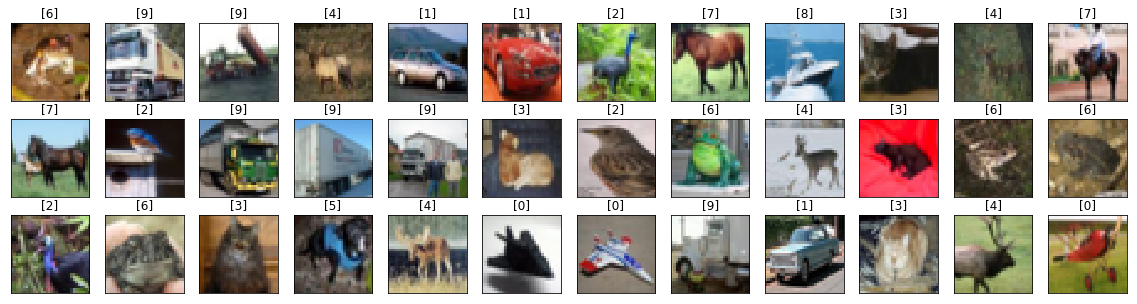

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Visualizing some data
fig = plt.figure(figsize = (20,5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i + 1, xticks = [], yticks =[])
  ax.imshow(np.squeeze(x_train[i]))
  ax.set_title(y_train[i])

In [0]:
# data preprocessing to convert all the values in range 0 and 1
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [0]:
# One hot encoding the labels 
from keras.utils import np_utils

num_classes = len(np.unique(y_train))

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
# generating testing and training data
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [15]:

print('x_train shape {0}'.format(x_train.shape))
print('x valid shape ',x_valid.shape)
print('x_test shape ', x_test.shape)

x_train shape (45000, 32, 32, 3)
x valid shape  (5000, 32, 32, 3)
x_test shape  (10000, 32, 32, 3)


In [43]:
# Defining and building the model archetecture

from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu',
                 input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 64)          0         
__________

In [0]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])


In [71]:
# training the model 
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5',
                               verbose = 1,
                               save_best_only = True)
hist = model.fit(x_train, y_train, batch_size = 1000, epochs = 10,
                validation_data = [x_valid, y_valid], callbacks = [checkpointer],
                verbose = 2, shuffle = True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 2s - loss: 0.3681 - acc: 0.8677 - val_loss: 0.6686 - val_acc: 0.7760

Epoch 00001: val_loss improved from inf to 0.66859, saving model to model.weights.best.hdf5
Epoch 2/10
 - 1s - loss: 0.3708 - acc: 0.8661 - val_loss: 0.6627 - val_acc: 0.7780

Epoch 00002: val_loss improved from 0.66859 to 0.66273, saving model to model.weights.best.hdf5
Epoch 3/10
 - 1s - loss: 0.3634 - acc: 0.8687 - val_loss: 0.6639 - val_acc: 0.7782

Epoch 00003: val_loss did not improve from 0.66273
Epoch 4/10
 - 1s - loss: 0.3597 - acc: 0.8704 - val_loss: 0.6646 - val_acc: 0.7780

Epoch 00004: val_loss did not improve from 0.66273
Epoch 5/10
 - 1s - loss: 0.3600 - acc: 0.8710 - val_loss: 0.6688 - val_acc: 0.7746

Epoch 00005: val_loss did not improve from 0.66273
Epoch 6/10
 - 1s - loss: 0.3604 - acc: 0.8703 - val_loss: 0.6710 - val_acc: 0.7774

Epoch 00006: val_loss did not improve from 0.66273
Epoch 7/10
 - 1s - loss: 0.3571 - acc: 0.8710 - val_los

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [73]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7637


In [0]:
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


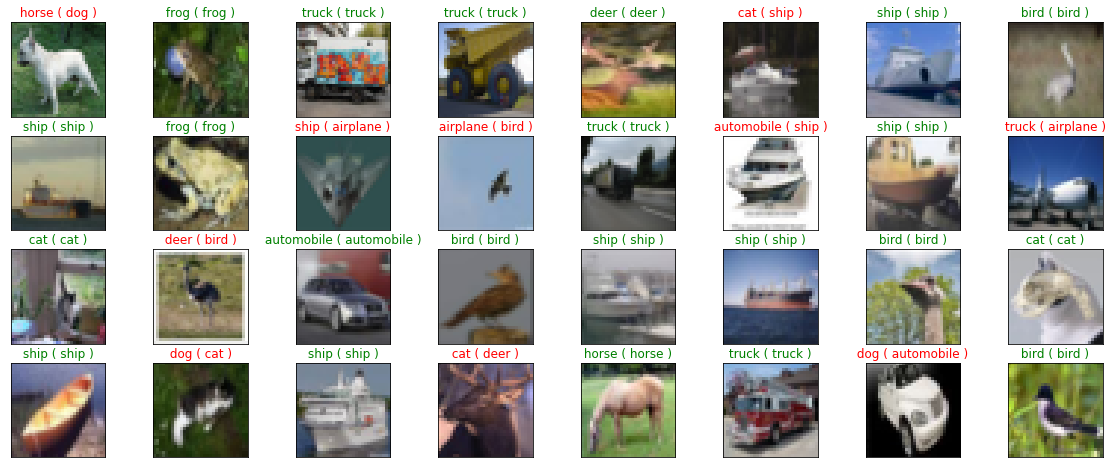

In [75]:
fig = plt.figure(figsize = (20,8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
  ax = fig.add_subplot(4, 8, i + 1, xticks = [], yticks = [])
  ax.imshow(np.squeeze(x_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title(" {} ( {} ) ".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
              color = 'green' if pred_idx == true_idx else 'red')
  

In [31]:
print(np.argmax(y_test[0]))
print(y_test[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
